# E-commerce site clients segmentation

# Content
- [Unpickling dataframes](#Unpickling-dataframes)
- [Automatic segmentation](#Automatic-segmentation)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use seaborn style defaults and set the default figure size
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 6)})

## Unpickling dataframe

After we pickled the dataframe, we have to unpickle it.

In [3]:
# To unpickle the dataframe

new_df_for_segmentation_analysis = pd.read_pickle("./pickle_data_automatic_segmentation.pkl")
rfm_new_df_for_automatic_segmentation = pd.read_pickle("./pickle_data_RFM_segmentation.pkl")

## Automatic segmentation

In [4]:
automatic_segmentation_df = new_df_for_segmentation_analysis.copy()

In [5]:
automatic_segmentation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91231 entries, 0 to 115298
Data columns (total 30 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   customer_unique_id                              91231 non-null  object 
 1   median_review_score                             91231 non-null  float64
 2   median_order_total_number_of_items              91231 non-null  float64
 3   median_number_of_orders_for_a_customer          91231 non-null  float64
 4   median_payment_value                            91231 non-null  float64
 5   median_appliances_products_per_customer         91231 non-null  float64
 6   median_of_arts_products_per_customer            91231 non-null  float64
 7   median_of_auto_products_per_customer            91231 non-null  float64
 8   median_of_construction_products_per_customer    91231 non-null  float64
 9   median_of_electronics_products_per_cus

We will eliminate information containing some identifiers such as the product, order and customer. We will eliminate the customer_zip_code_prefix because we will keep the customer city and state. 

We will also eliminate the variables median_number_of_orders_for_a_customer and median_payment_value because we will merge the present dataframe with the one created for the RFM analysis and we will keep the Recency, Frequency and Monetary_value features.

In [6]:
automatic_segmentation_df.columns

Index(['customer_unique_id', 'median_review_score',
       'median_order_total_number_of_items',
       'median_number_of_orders_for_a_customer', 'median_payment_value',
       'median_appliances_products_per_customer',
       'median_of_arts_products_per_customer',
       'median_of_auto_products_per_customer',
       'median_of_construction_products_per_customer',
       'median_of_electronics_products_per_customer',
       'median_of_fashion_products_per_customer',
       'median_of_food_drinks_products_per_customer',
       'median_of_garden_pets_products_per_customer',
       'median_of_health_beauty_products_per_customer',
       'median_of_home_products_per_customer',
       'median_of_office_products_per_customer',
       'median_of_other_products_per_customer',
       'median_of_sports_leisure_products_per_customer', 'order_id',
       'payment_type', 'zip_code_prefix', 'median_geolocation_lat',
       'median_geolocation_lng', 'customer_city', 'customer_state',
       'order_

In [7]:
automatic_segmentation_df = automatic_segmentation_df.drop(columns=[
                                                                    'median_number_of_orders_for_a_customer',
                                                                    'median_payment_value',
                                                                    'order_id',
                                                                    'payment_type', 
                                                                    'zip_code_prefix', 
                                                                    'median_geolocation_lat',
                                                                    'median_geolocation_lng', 
                                                                    'customer_city', 
                                                                    'customer_state',
                                                                    'order_purchase_timestamp', 
                                                                    'order_delivered_customer_date',
                                                                    'product_category_name_english'
                                                                    ])

In [8]:
automatic_segmentation_new_df = automatic_segmentation_df.copy()

In [9]:
automatic_segmentation_new_df = pd.merge(automatic_segmentation_df, rfm_new_df_for_automatic_segmentation, on='customer_unique_id')

In [10]:
automatic_segmentation_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91231 entries, 0 to 91230
Data columns (total 22 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   customer_unique_id                              91231 non-null  object 
 1   median_review_score                             91231 non-null  float64
 2   median_order_total_number_of_items              91231 non-null  float64
 3   median_appliances_products_per_customer         91231 non-null  float64
 4   median_of_arts_products_per_customer            91231 non-null  float64
 5   median_of_auto_products_per_customer            91231 non-null  float64
 6   median_of_construction_products_per_customer    91231 non-null  float64
 7   median_of_electronics_products_per_customer     91231 non-null  float64
 8   median_of_fashion_products_per_customer         91231 non-null  float64
 9   median_of_food_drinks_products_per_cust

In [11]:
# automatic_segmentation_new_df = automatic_segmentation_new_df.drop(columns=['customer_unique_id'
#                                                                 ])

In [12]:
automatic_segmentation_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91231 entries, 0 to 91230
Data columns (total 22 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   customer_unique_id                              91231 non-null  object 
 1   median_review_score                             91231 non-null  float64
 2   median_order_total_number_of_items              91231 non-null  float64
 3   median_appliances_products_per_customer         91231 non-null  float64
 4   median_of_arts_products_per_customer            91231 non-null  float64
 5   median_of_auto_products_per_customer            91231 non-null  float64
 6   median_of_construction_products_per_customer    91231 non-null  float64
 7   median_of_electronics_products_per_customer     91231 non-null  float64
 8   median_of_fashion_products_per_customer         91231 non-null  float64
 9   median_of_food_drinks_products_per_cust

### Feature transformation and standardization for outlier detection 

#### Log-transform for skewed distributions

We are going to apply a logaritmic transformation to the variables that are more asymmetrical from our data. Log transformation also de-emphasizes outliers and allows us to potentially obtain a bell-shaped distribution. The idea is that taking the log of the data can restore symmetry to the data.

See references: 

* https://www.sciencedirect.com/topics/computer-science/log-transformation#:~:text=Log%20transformation%20also%20de%2Demphasizes,restore%20symmetry%20to%20the%20data.&text=If%20the%20distance%20between%20each,the%20variable%20skews%20the%20distance
* https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

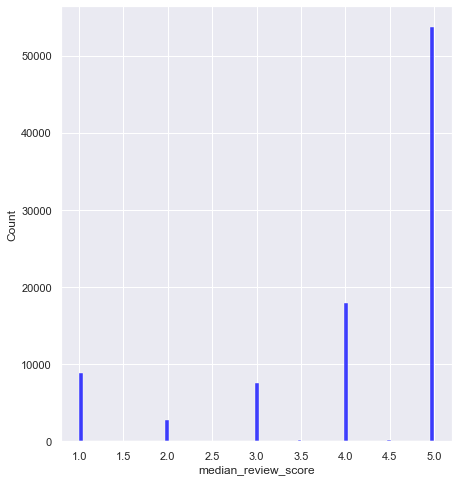

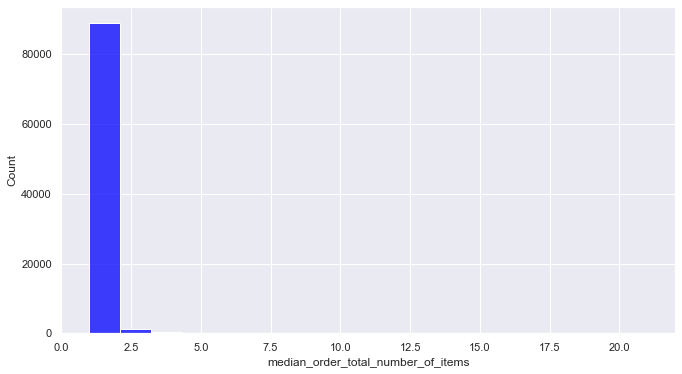

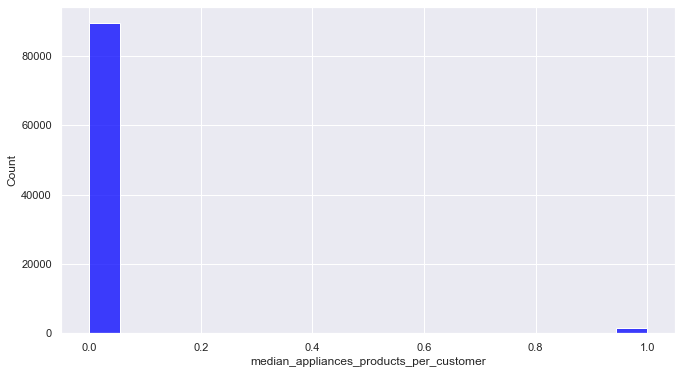

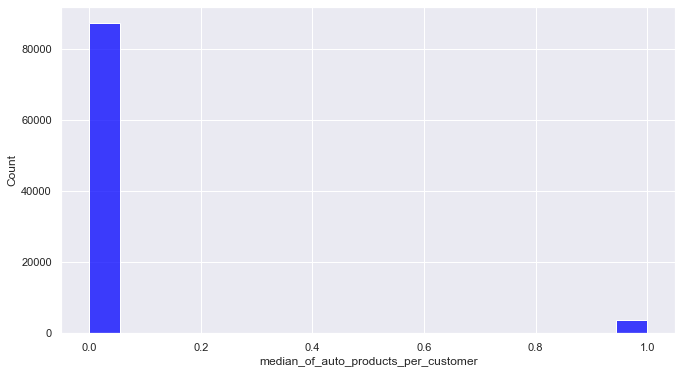

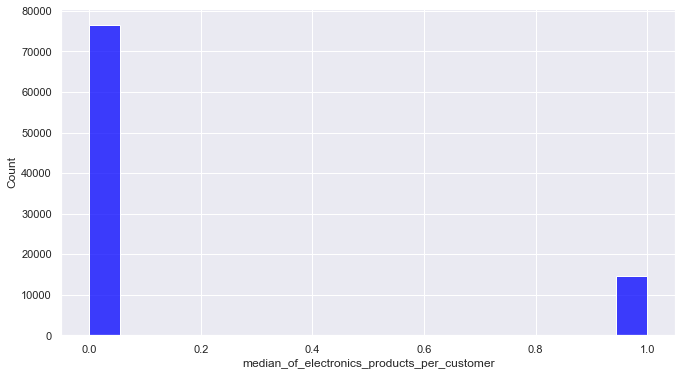

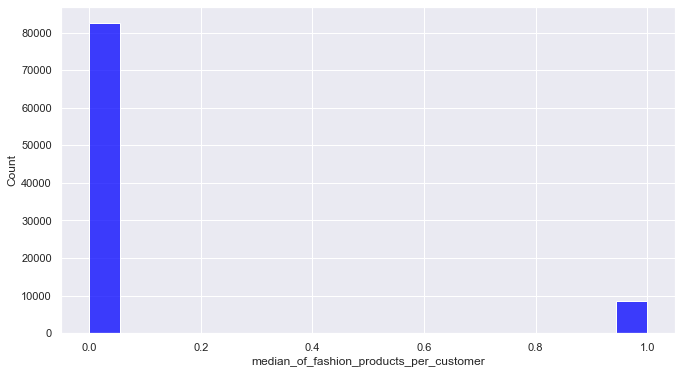

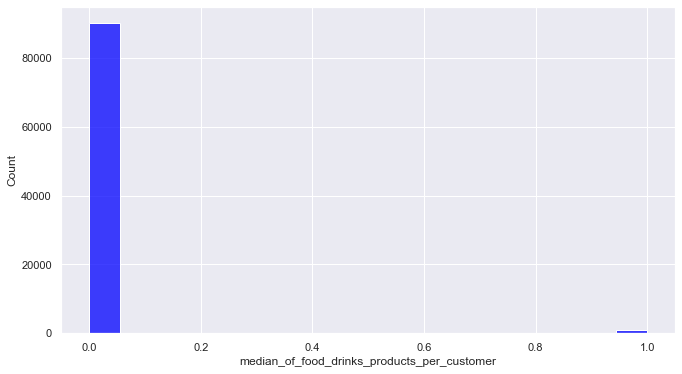

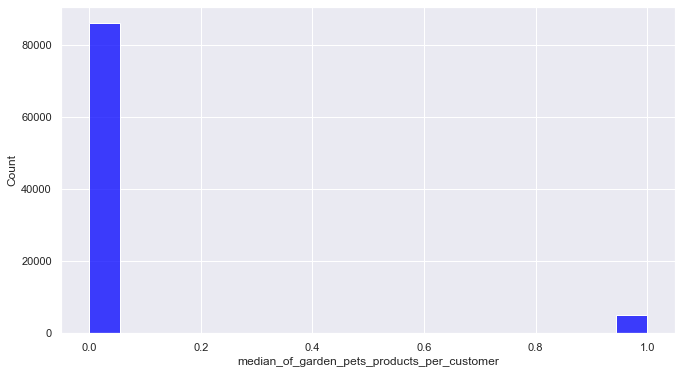

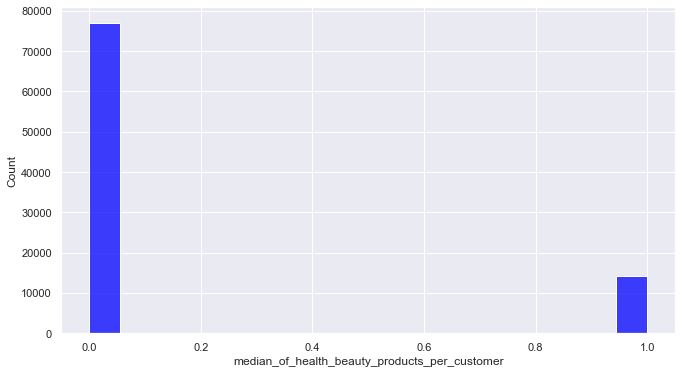

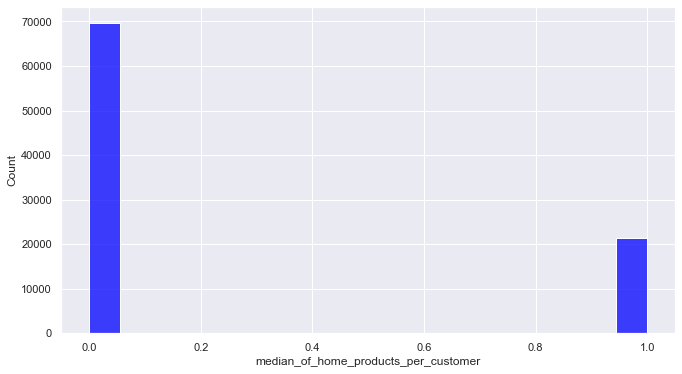

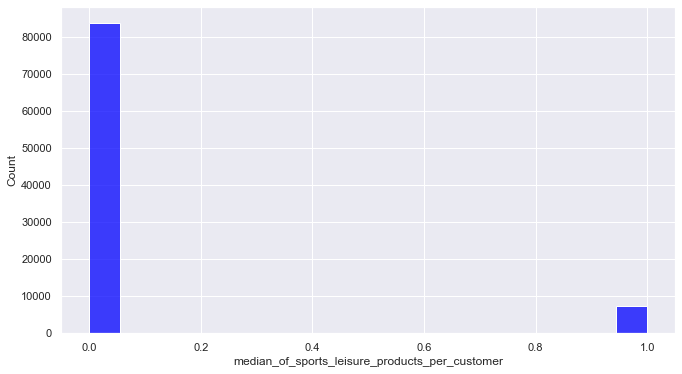

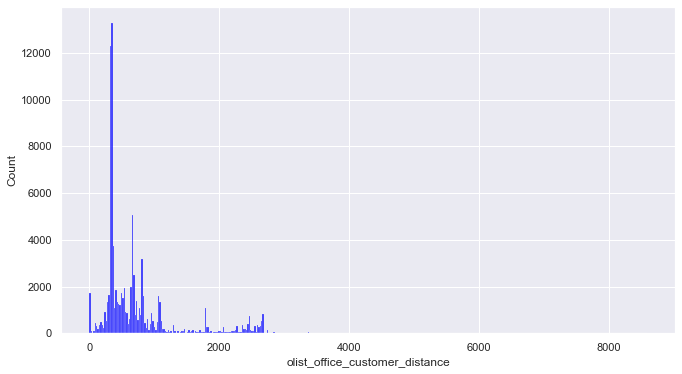

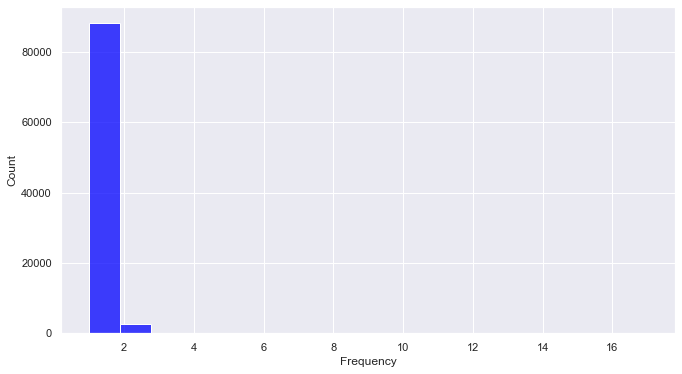

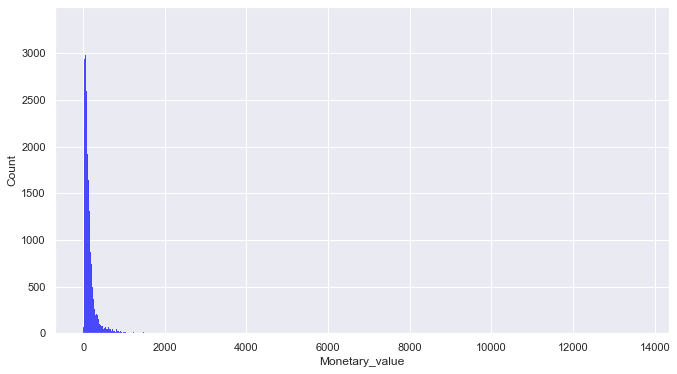

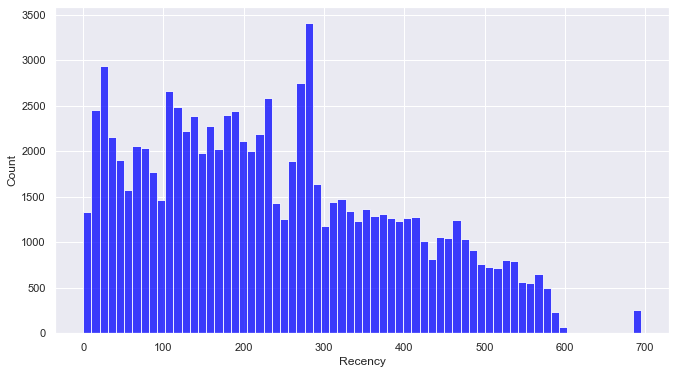

In [13]:
plt.subplots(figsize=(7, 8))

columns_histogram = automatic_segmentation_new_df.columns.tolist()
columns_histogram.remove('Segment_name')
columns_histogram.remove('customer_unique_id')

for i in columns_histogram:
    sns.histplot(data = automatic_segmentation_new_df, x=i, color="blue")
    plt.show()

In [14]:
df_log_transformed = automatic_segmentation_new_df.copy()

In [15]:
columns_for_log_transformation = ['median_order_total_number_of_items',
                                    'Frequency',
                                    'Monetary_value',
                                    'delay_days_purchase_delivery',
                                    'olist_office_customer_distance'
                                    ]

In [16]:
for col in df_log_transformed.columns:
    if col in columns_for_log_transformation:
        df_log_transformed[col] = np.log10(df_log_transformed[col] + 0.1) 

In [17]:
# columns_histogram = df_log_transformed.columns.tolist()
# columns_histogram.remove('Segment_name')

# plt.subplots(figsize=(7, 8))
# for i in columns_histogram:
#     sns.histplot(data=df_log_transformed, x=i, color="blue")
#     plt.show()

In [18]:
df_log_transformed.describe()

median_review_score  median_order_total_number_of_items  \
count         91231.000000                        91231.000000   
mean              4.153243                            0.075748   
std               1.282005                            0.109224   
min               1.000000                            0.041393   
25%               4.000000                            0.041393   
50%               5.000000                            0.041393   
75%               5.000000                            0.041393   
max               5.000000                            1.324282   

       median_appliances_products_per_customer  \
count                             91231.000000   
mean                                  0.017275   
std                                   0.130294   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   0.000000   
max                                   1.000000   

       median_of_arts_products_per_customer  \
count                          91231.000000   
mean                               0.060506   
std                                0.238423   
min                                0.000000   
25%                                0.000000   
50%                                0.000000   
75%                                0.000000   
max                                1.000000   

       median_of_auto_products_per_customer  \
count                          91231.000000   
mean                               0.041039   
std                                0.198381   
min                                0.000000   
25%                                0.000000   
50%                                0.000000   
75%                                0.000000   
max                                1.000000   

       median_of_construction_products_per_customer  \
count                                  91231.000000   
mean                                       0.023161   
std                                        0.150415   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        0.000000   
max                                        1.000000   

       median_of_electronics_products_per_customer  \
count                                 91231.000000   
mean                                      0.160220   
std                                       0.366812   
min                                       0.000000   
25%                                       0.000000   
50%                                       0.000000   
75%                                       0.000000   
max                                       1.000000   

       median_of_fashion_products_per_customer  \
count                             91231.000000   
mean                                  0.094222   
std                                   0.292139   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   0.000000   
max                                   1.000000   

       median_of_food_drinks_products_per_customer  \
count                                 91231.000000   
mean                                      0.010216   
std                                       0.100556   
min                                       0.000000   
25%                                       0.000000   
50%                                       0.000000   
75%                                       0.000000   
max                                       1.000000   

       median_of_garden_pets_products_per_customer  \
count                                 91231.000000   
mean                                      0.055595   
std                           

#### Z-scores standardization

We are going to use Z-scores to detect outliers in our data, and to standardize it. See references: 

* https://www.mygreatlearning.com/blog/outlier-analysis-explained/
* https://www.codecademy.com/article/normalization
* https://jamesmccaffrey.wordpress.com/2020/05/27/should-you-normalize-and-encode-data-before-train-test-splitting-or-after-splitting/

In [19]:
df_for_z_scores = df_log_transformed.copy()

In [20]:
columns_for_z_scores = df_for_z_scores.columns.tolist()
columns_for_z_scores.remove('Segment_name')
columns_for_z_scores.remove('customer_unique_id')

for col in df_for_z_scores.columns:
    if col in columns_for_z_scores:
        # standardize data
        df_for_z_scores[col] = (df_for_z_scores[col] - df_for_z_scores[col].mean()) / df_for_z_scores[col].std()

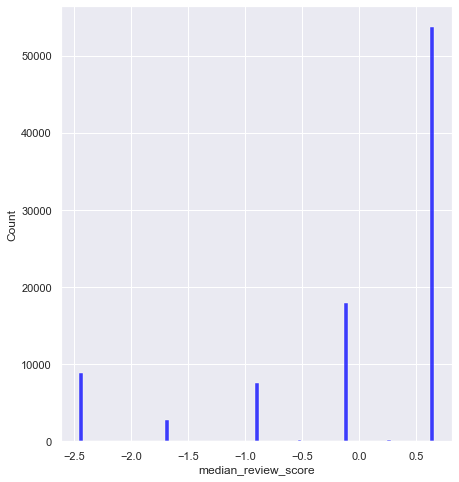

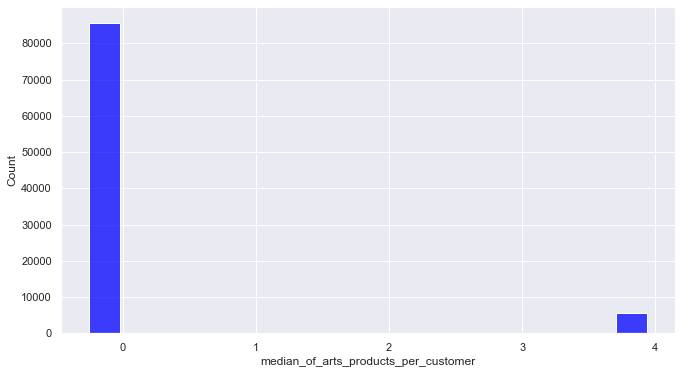

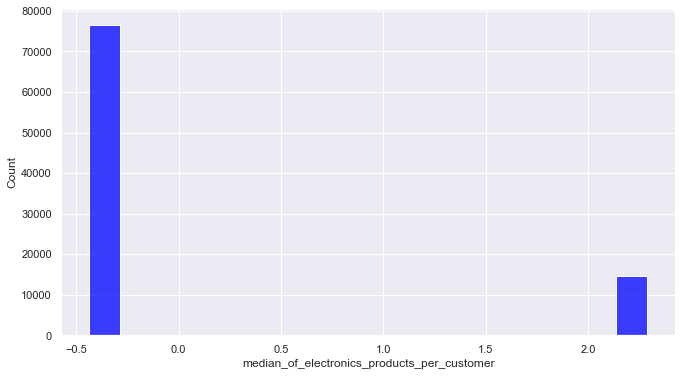

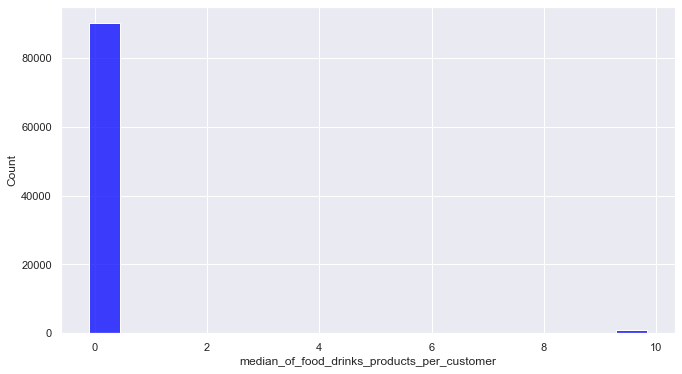

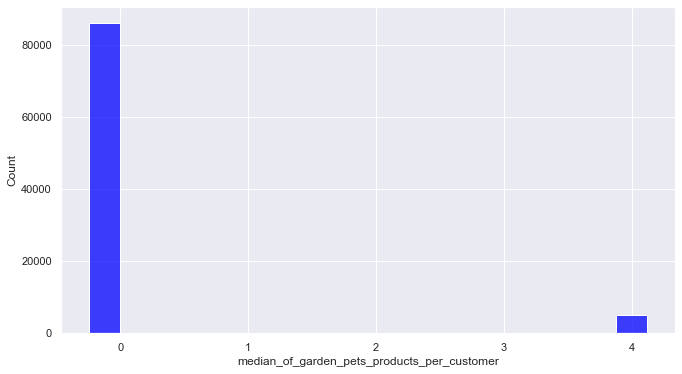

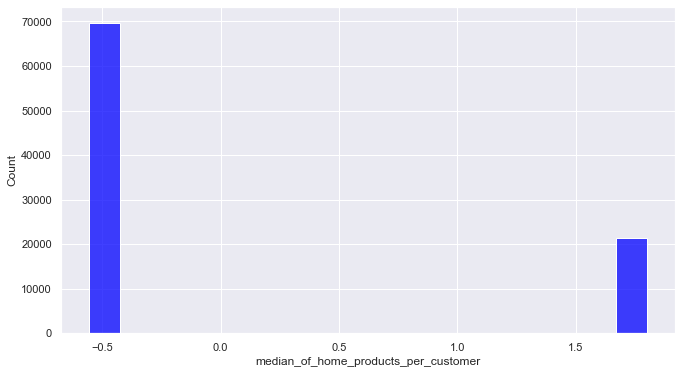

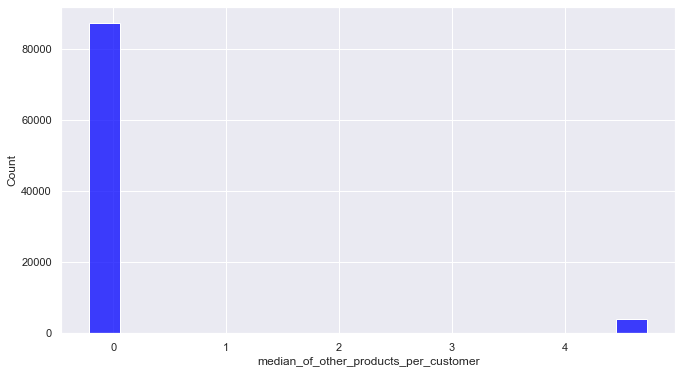

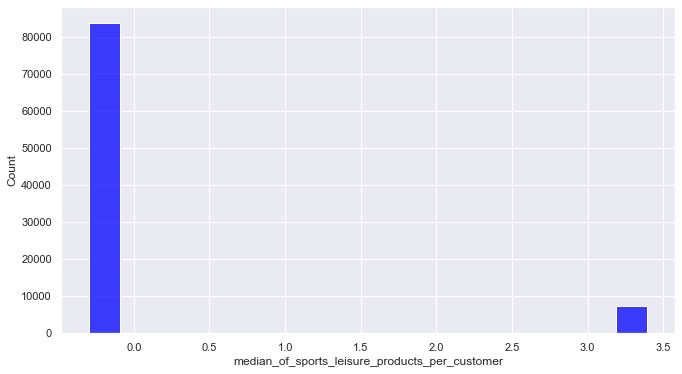

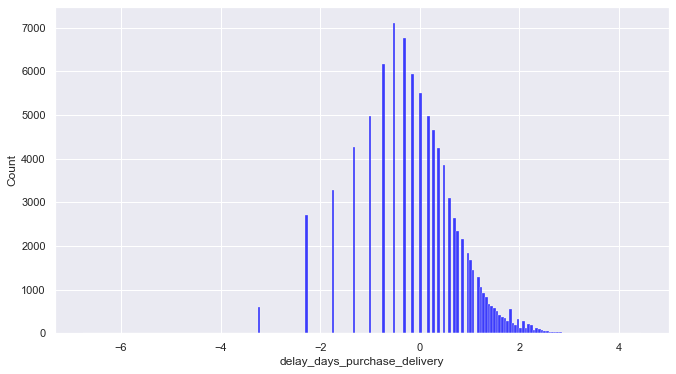

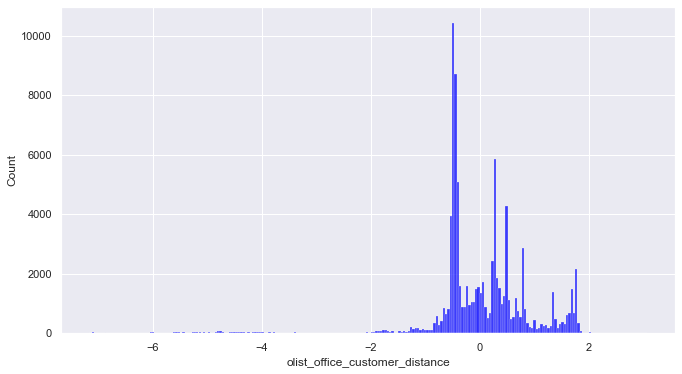

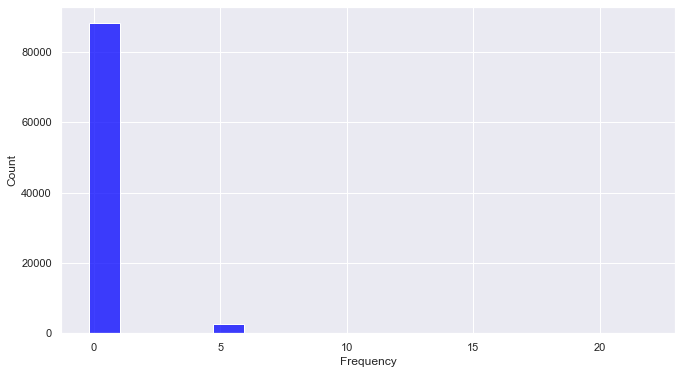

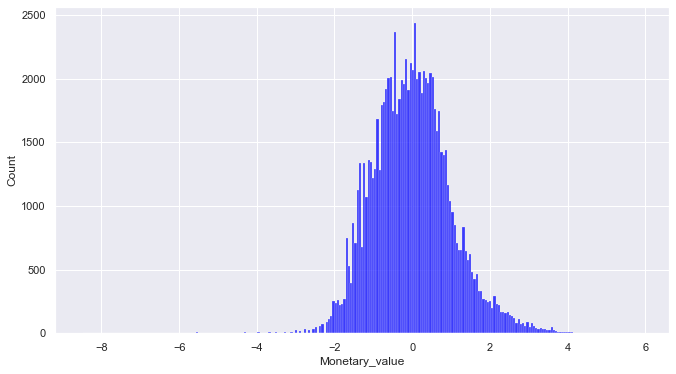

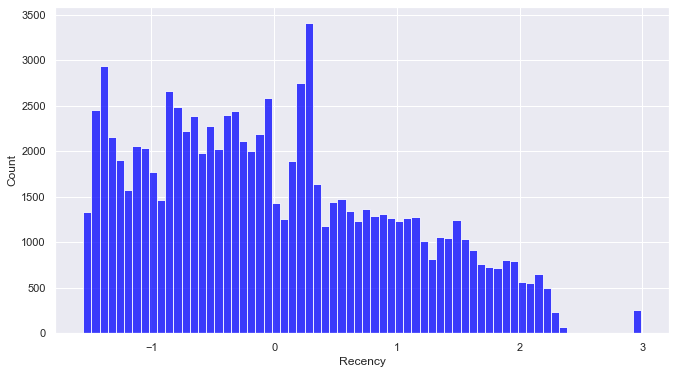

In [21]:
columns_histogram = df_for_z_scores.columns.tolist()
columns_histogram.remove('Segment_name')
columns_histogram.remove('customer_unique_id')

plt.subplots(figsize=(7, 8))
for i in columns_histogram:
    sns.histplot(data=df_for_z_scores, x=i, color="blue")
    plt.show()

In [174]:
df_standardized = df_for_z_scores.copy()

In [236]:
df_standardized_without_outliers = df_standardized.loc[
                                                    (df_standardized['median_order_total_number_of_items'] >= -4) & (df_standardized['median_order_total_number_of_items'] <= 4)
                                                    & (df_standardized['Frequency'] >= -5) & (df_standardized['Frequency'] <= 5)
                                                    & (df_standardized['Monetary_value'] >= -4) & (df_standardized['Monetary_value'] <= 4)
                                                    & (df_standardized['Recency'] >= -4) & (df_standardized['Recency'] <= 4)
                                                    & (df_standardized['delay_days_purchase_delivery'] >= -4) & (df_standardized['delay_days_purchase_delivery'] <= 4)
                                                    & (df_standardized['olist_office_customer_distance'] >= -3) & (df_standardized['olist_office_customer_distance'] <= 3)]

In [237]:
df_standardized_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85622 entries, 0 to 91229
Data columns (total 22 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   customer_unique_id                              85622 non-null  object 
 1   median_review_score                             85622 non-null  float64
 2   median_order_total_number_of_items              85622 non-null  float64
 3   median_appliances_products_per_customer         85622 non-null  float64
 4   median_of_arts_products_per_customer            85622 non-null  float64
 5   median_of_auto_products_per_customer            85622 non-null  float64
 6   median_of_construction_products_per_customer    85622 non-null  float64
 7   median_of_electronics_products_per_customer     85622 non-null  float64
 8   median_of_fashion_products_per_customer         85622 non-null  float64
 9   median_of_food_drinks_products_per_cust

In [238]:
# columns_histogram = df_standardized_without_outliers.columns.tolist()
# columns_histogram.remove('Segment_name')

# plt.subplots(figsize=(7, 8))
# for i in columns_histogram:
#     sns.histplot(data=df_standardized_without_outliers, x=i, color="blue")
#     plt.show()

In [239]:
# df_standardized_without_outliers.columns

### PCA for dimensionality reduction

#### Case 1: We keep product_category_name_english and eliminate the median of product type per customer features

In the following case, we will explore the quality of clusters by keeping the product_category_name_english and eliminating the median of product type per customer features. We will keep a smaller number of features that might be easier to interpret.

In [240]:
df_for_PCA_case_one = df_standardized_without_outliers.copy()

In [241]:
df_for_PCA_case_one.columns

Index(['customer_unique_id', 'median_review_score',
       'median_order_total_number_of_items',
       'median_appliances_products_per_customer',
       'median_of_arts_products_per_customer',
       'median_of_auto_products_per_customer',
       'median_of_construction_products_per_customer',
       'median_of_electronics_products_per_customer',
       'median_of_fashion_products_per_customer',
       'median_of_food_drinks_products_per_customer',
       'median_of_garden_pets_products_per_customer',
       'median_of_health_beauty_products_per_customer',
       'median_of_home_products_per_customer',
       'median_of_office_products_per_customer',
       'median_of_other_products_per_customer',
       'median_of_sports_leisure_products_per_customer',
       'delay_days_purchase_delivery', 'olist_office_customer_distance',
       'Segment_name', 'Frequency', 'Monetary_value', 'Recency'],
      dtype='object')

In [242]:
df_for_PCA_case_one = df_for_PCA_case_one.drop(columns=[
    'median_appliances_products_per_customer',
    'median_of_arts_products_per_customer',
    'median_of_auto_products_per_customer', 
    'median_of_construction_products_per_customer',
    'median_of_electronics_products_per_customer',
    'median_of_fashion_products_per_customer',
    'median_of_food_drinks_products_per_customer', 
    'median_of_garden_pets_products_per_customer', 
    'median_of_health_beauty_products_per_customer',
    'median_of_home_products_per_customer',
    'median_of_office_products_per_customer',
    'median_of_other_products_per_customer',
    'median_of_sports_leisure_products_per_customer'
])

In the present case, we keep 6 variables, from which we will not use the object type Segment_name variable.

In [243]:
df_for_PCA_case_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85622 entries, 0 to 91229
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   customer_unique_id                  85622 non-null  object 
 1   median_review_score                 85622 non-null  float64
 2   median_order_total_number_of_items  85622 non-null  float64
 3   delay_days_purchase_delivery        85622 non-null  float64
 4   olist_office_customer_distance      85622 non-null  float64
 5   Segment_name                        85622 non-null  object 
 6   Frequency                           85622 non-null  float64
 7   Monetary_value                      85622 non-null  float64
 8   Recency                             85622 non-null  float64
dtypes: float64(7), object(2)
memory usage: 6.5+ MB


In [244]:
df_for_PCA_case_one.head()

customer_unique_id  median_review_score  \
0  0000366f3b9a7992bf8c76cfdf3221e2             0.660494   
1  0000b849f77a49e4a4ce2b2a4ca5be3f            -0.119534   
2  0000f46a3911fa3c0805444483337064            -0.899562   
3  0000f6ccb0745a6a4b88665a16c9f078            -0.119534   
4  0004aac84e0df4da2b147fca70cf8255             0.660494   

   median_order_total_number_of_items  delay_days_purchase_delivery  \
0                           -0.314543                     -0.731098   
1                           -0.314543                     -1.724060   
2                           -0.314543                      1.401335   
3                           -0.314543                      1.018144   
4                           -0.314543                      0.390129   

   olist_office_customer_distance      Segment_name  Frequency  \
0                       -0.470234    About To Sleep   -0.17879   
1                       -0.514157    About To Sleep   -0.17879   
2                       -0.838033  Recent customers   -0.17879   
3                        1.790624  Recent customers   -0.17879   
4                       -0.677719  Recent customers   -0.17879   

   Monetary_value   Recency  
0        0.346429 -0.830536  
1       -1.666547 -0.810913  
2       -0.262229  1.955978  
3       -1.075013  0.543098  
4        0.743898  0.327241

The following two cells are functions extracted from the Open Classrooms documentation from the course "Réalisez une analyse exploratoire de données". They are avaibale in GitHub, as indicated in their corresponding links.

The next cell contains a function that draws the correlation circles. The following correlation circles visualize the correlation between the first four principal components and the original dataset features. In such correlations  are shown via coordinates.
http://rasbt.github.io/mlxtend/user_guide/plotting/plot_pca_correlation_graph/ 

In [245]:
# Extracted from OP gitcode. See reference:
#https://github.com/stenier-oc/realisez-une-analyse-de-donnees-exploratoire/blob/master/functions.py

def display_circles(components_pca, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            ax = plt.subplots(figsize=(10,8))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif components_pca.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(components_pca[d1,:]), max(components_pca[d1,:]), min(components_pca[d2,:]), max(components_pca[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if components_pca.shape[1] < 30 :
                plt.quiver(np.zeros(components_pca.shape[1]), np.zeros(components_pca.shape[1]),
                   components_pca[d1,:], components_pca[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in components_pca[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(components_pca[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Correlation circle (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

The next cell contains a function that draws the projected data into the factorial planes for the first four principal components.

In [246]:
# Extracted from OP gitcode. See reference:
#https://github.com/stenier-oc/realisez-une-analyse-de-donnees-exploratoire/blob/master/functions.py

def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            plt.figure(figsize=(10,8))
        
            # affichage des points
            if illustrative_var is None:
                sns.scatterplot(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    sns.scatterplot(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projected data (on F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
            # plt.colorbar()

In [247]:
from sklearn.decomposition import PCA
features = df_for_PCA_case_one.drop(columns=['Segment_name', 'customer_unique_id']).columns
names = df_for_PCA_case_one.drop(columns=['Segment_name', 'customer_unique_id']).index


# PCA
pca_case_one = PCA(n_components=7) # We start with the total number of features
pca_result_case_one = pca_case_one.fit_transform(df_for_PCA_case_one.drop(columns=['Segment_name', 'customer_unique_id']).values)
pca_result_case_one

array([[-1.10852774e+00,  7.73868336e-01, -2.92503970e-01, ...,
        -3.59393078e-01,  2.90924838e-01,  2.72131461e-17],
       [-2.08332037e+00, -7.95852556e-02,  1.44819795e+00, ...,
        -8.05967289e-02, -2.90551851e-01,  2.72131461e-17],
       [ 1.54899524e+00, -1.74565093e+00,  1.02286368e-01, ...,
        -4.97044541e-01,  1.15906120e+00,  2.72131461e-17],
       ...,
       [ 1.44495590e+00, -5.50561534e-01,  2.60904448e-01, ...,
         5.09635064e-01, -3.61452830e-01,  2.72131461e-17],
       [ 9.37622405e-01, -1.89180390e+00, -1.31058544e+00, ...,
         1.93578943e-01, -7.70192785e-01,  2.72131461e-17],
       [-1.30600728e-01,  5.42540164e-01, -2.54675646e-01, ...,
         1.49740954e-01, -1.52296972e-01,  2.72131461e-17]])

In [248]:
pca_result_case_one.shape

(85622, 7)

The explained_variance_ratio_ attribute of the PCA() class returns a one-dimensional numpy array which contains the values of the percentage of variance explained by each of the selected components.

https://towardsdatascience.com/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0

In [249]:
(pca_case_one.explained_variance_ratio_ * 100).round(1)

array([28. , 20. , 18.4, 15.6, 10.6,  7.4,  0. ])

<!-- According to the previous result, the first component alone captures about 28% of the variability in the dataset. Then the second component alone captures about 20% of the variability in the dataset and so on.  -->

In [250]:
print("Variance explained by all 7 components = {:.2f}".format(sum(pca_case_one.explained_variance_ratio_ * 100)))

Variance explained by all 7 components = 100.00


Text(0, 0.5, 'Cumulative Explained Variance')

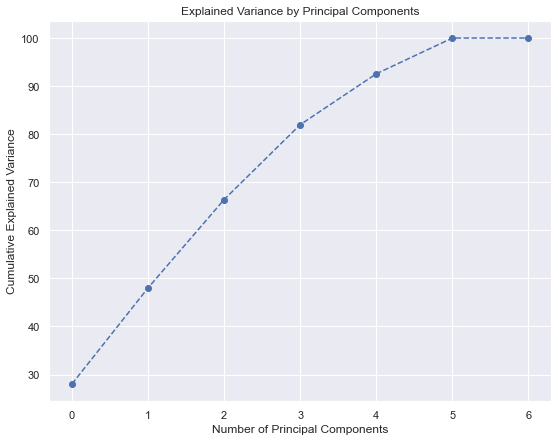

In [251]:
plt.subplots(figsize=(9, 7))
plt.plot(range(0,7),(pca_case_one.explained_variance_ratio_*100).cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80% of the variance. So, in this instance, we decide to keep 3 components.

##### Correlation circles visualization

By executing the function display_circles() we obtain the correlation circles.

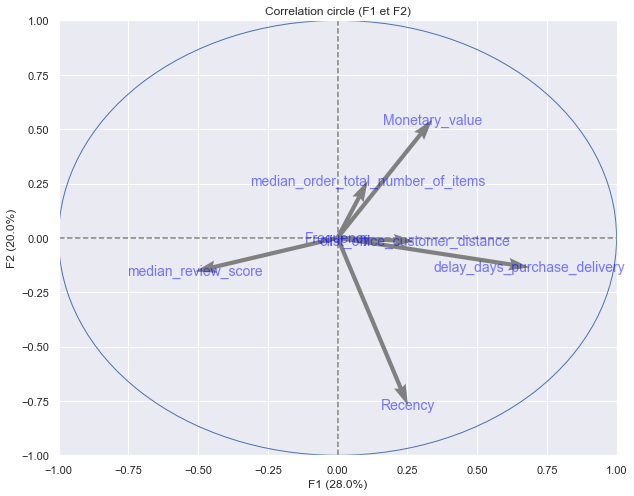

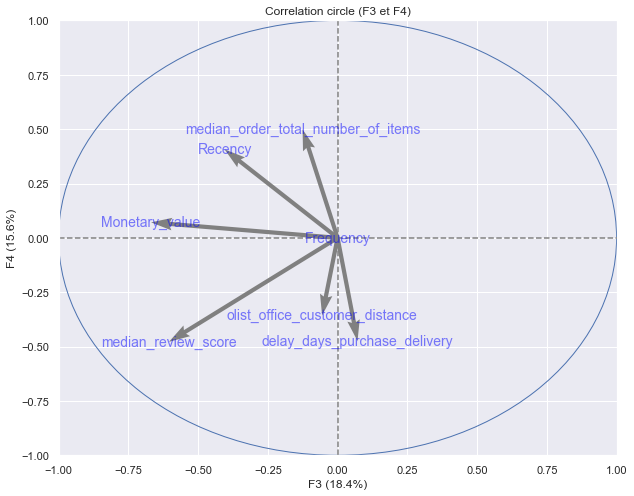

In [252]:
# Code extracted from OP example
# Cercle des corrélations
# https://github.com/stenier-oc/realisez-une-analyse-de-donnees-exploratoire/blob/master/pca_my_courses.py
components_pca = pca_case_one.components_
display_circles(components_pca, 7, pca_case_one, [(0,1),(2,3)], labels = np.array(features))

##### Projected data visualization

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


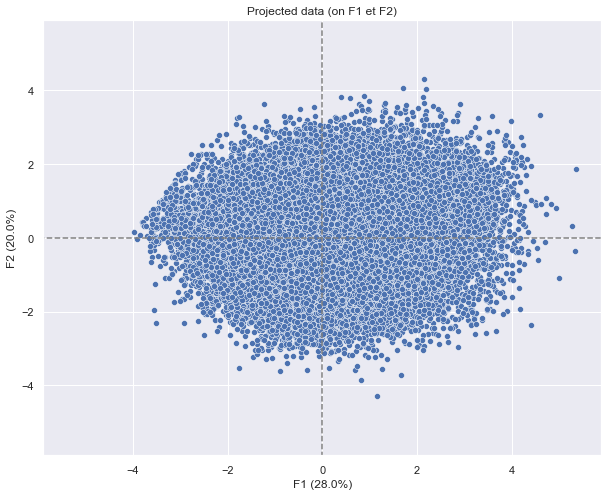

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


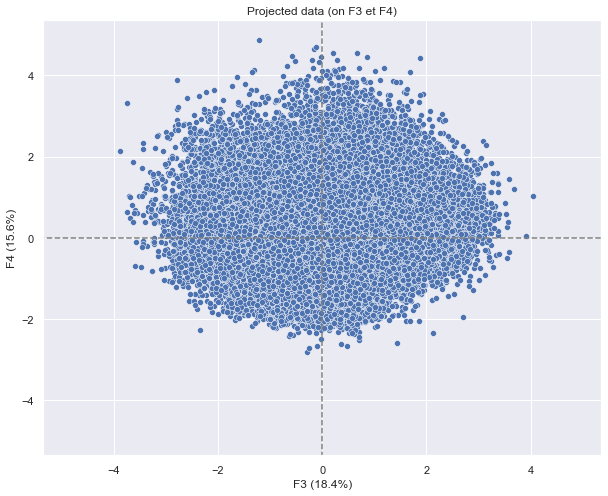

In [253]:
# Code extracted from OP example
# Projection des individus
# https://github.com/stenier-oc/realisez-une-analyse-de-donnees-exploratoire/blob/master/pca_my_courses.py
X_projected = pca_result_case_one
display_factorial_planes(X_projected, 7, pca_case_one, [(0,1),(2,3)])

##### Projected data visualization by customer segment name

For a better visualization we are going to add some colors by label to the prjected data on the principal components.

In [254]:
df_for_PCA_case_one['F1'] = pca_result_case_one[:,0]
df_for_PCA_case_one['F2'] = pca_result_case_one[:,1]
df_for_PCA_case_one['F3'] = pca_result_case_one[:,2]
df_for_PCA_case_one['F4'] = pca_result_case_one[:,3]

In [255]:
df_for_PCA_case_one.head()

customer_unique_id  median_review_score  \
0  0000366f3b9a7992bf8c76cfdf3221e2             0.660494   
1  0000b849f77a49e4a4ce2b2a4ca5be3f            -0.119534   
2  0000f46a3911fa3c0805444483337064            -0.899562   
3  0000f6ccb0745a6a4b88665a16c9f078            -0.119534   
4  0004aac84e0df4da2b147fca70cf8255             0.660494   

   median_order_total_number_of_items  delay_days_purchase_delivery  \
0                           -0.314543                     -0.731098   
1                           -0.314543                     -1.724060   
2                           -0.314543                      1.401335   
3                           -0.314543                      1.018144   
4                           -0.314543                      0.390129   

   olist_office_customer_distance      Segment_name  Frequency  \
0                       -0.470234    About To Sleep   -0.17879   
1                       -0.514157    About To Sleep   -0.17879   
2                       -0.838033  Recent customers   -0.17879   
3                        1.790624  Recent customers   -0.17879   
4                       -0.677719  Recent customers   -0.17879   

   Monetary_value   Recency        F1        F2        F3        F4  
0        0.346429 -0.830536 -1.108528  0.773868 -0.292504 -0.196296  
1       -1.666547 -0.810913 -2.083320 -0.079585  1.448198  0.527800  
2       -0.262229  1.955978  1.548995 -1.745651  0.102286  0.758992  
3       -1.075013  0.543098  0.980370 -1.208029  0.572791 -1.002292  
4        0.743898  0.327241  0.032088 -0.050706 -0.935159 -0.155003

Text(0.5, 1.0, 'PCA analysis')

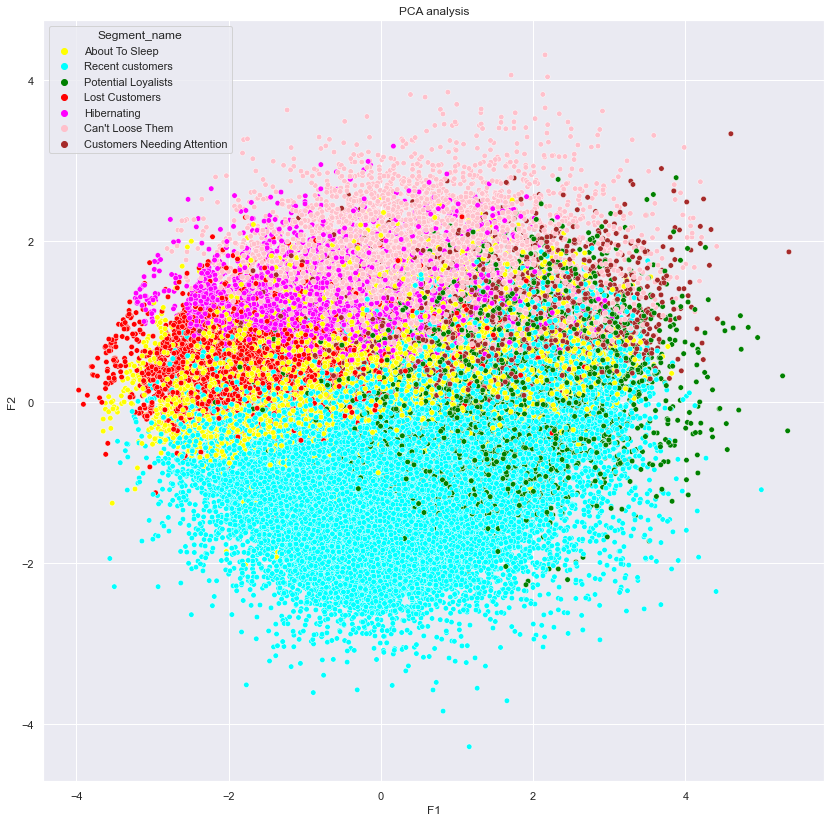

In [305]:
plt.subplots(figsize=(14, 14))
my_pal = {"Lost Customers":"red",
           "Hibernating":"magenta",
           "About To Sleep":"yellow",
           "Can\'t Loose Them":"pink",
           "At Risk":"deeppink",
           "Customers Needing Attention":"brown",
           "Recent customers":"cyan",
           "Potential Loyalists":"green",
           "Loyal Customers":"blue"}
sns.scatterplot(x="F1", y="F2", hue="Segment_name", data=df_for_PCA_case_one, palette=my_pal, s=30)
plt.title('PCA analysis')

In [303]:
# plt.subplots(figsize=(14, 14))
# my_pal = {"Lost Customers":"red",
#            "Hibernating":"magenta",
#            "About To Sleep":"yellow",
#            "Can\'t Loose Them":"pink",
#            "At Risk":"deeppink",
#            "Customers Needing Attention":"brown",
#            "Recent customers":"cyan",
#            "Potential Loyalists":"green",
#            "Loyal Customers":"blue"}
# sns.scatterplot(x="F1", y="F2", hue="Segment_name", 
#                 data=df_for_PCA_case_one.loc[df_for_PCA_case_one['Segment_name'].isin(['Lost Customers', 
#                                                                                         'Potential Loyalists',
#                                                                                         'Recent customers'])], 
#                 palette=my_pal, s=12)
# plt.title('PCA analysis')

Text(0.5, 1.0, 'PCA analysis')

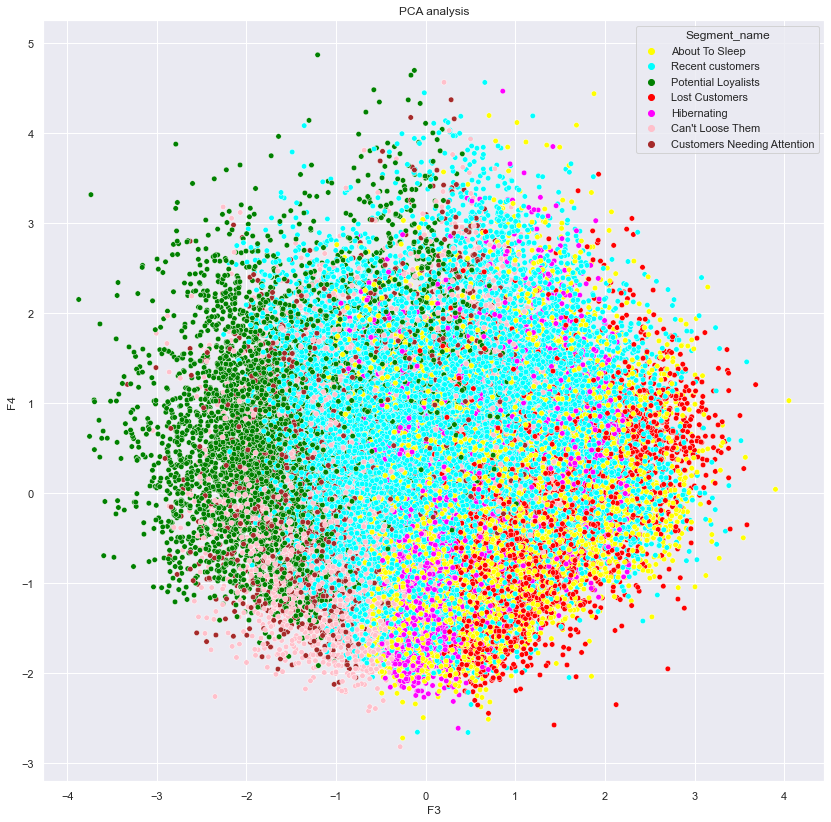

In [304]:
plt.subplots(figsize=(14, 14))
my_pal = {"Lost Customers":"red",
           "Hibernating":"magenta",
           "About To Sleep":"yellow",
           "Can\'t Loose Them":"pink",
           "At Risk":"deeppink",
           "Customers Needing Attention":"brown",
           "Recent customers":"cyan",
           "Potential Loyalists":"green",
           "Loyal Customers":"blue"}
sns.scatterplot(x="F3", y="F4", hue="Segment_name", data=df_for_PCA_case_one, palette=my_pal, s=30)
plt.title('PCA analysis')

## K-means clusterization

### Case one: result from PCA one

Visualization of the elbow method of our K-Means.

See reference: https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

In [259]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [260]:
df_k_means_reduced_PCA_case_one = df_for_PCA_case_one.copy()

In [261]:
df_k_means_reduced_PCA_case_one.columns

Index(['customer_unique_id', 'median_review_score',
       'median_order_total_number_of_items', 'delay_days_purchase_delivery',
       'olist_office_customer_distance', 'Segment_name', 'Frequency',
       'Monetary_value', 'Recency', 'F1', 'F2', 'F3', 'F4'],
      dtype='object')

#### Elbow method: determining the best K number of clusters

In [262]:
Sum_of_squared_distances_case_one = []
K = range(1,20) # Range of clusters to find the best fit
for k in K:
    k_means_result_case_one = KMeans(n_clusters=k)
    k_means_result_case_one = k_means_result_case_one.fit(df_k_means_reduced_PCA_case_one.drop(columns=['customer_unique_id', 'Segment_name', 'F1', 'F2', 'F3', 'F4']).values)
    Sum_of_squared_distances_case_one.append(k_means_result_case_one.inertia_)

In [263]:
df_k_means_reduced_PCA_case_one.drop(columns=['customer_unique_id', 'Segment_name', 'F1', 'F2', 'F3', 'F4']).values

array([[ 0.66049446, -0.31454345, -0.73109795, ..., -0.17879045,
         0.34642894, -0.83053642],
       [-0.11953376, -0.31454345, -1.72405956, ..., -0.17879045,
        -1.66654732, -0.81091308],
       [-0.89956199, -0.31454345,  1.40133469, ..., -0.17879045,
        -0.26222904,  1.95597813],
       ...,
       [-0.11953376, -0.31454345,  1.61050746, ..., -0.17879045,
        -0.27642118,  0.15717179],
       [ 0.66049446, -0.31454345,  0.59855794, ..., -0.17879045,
         0.05834362,  2.15875267],
       [ 0.66049446, -0.31454345,  0.27364333, ..., -0.17879045,
         0.2760351 , -0.77820751]])

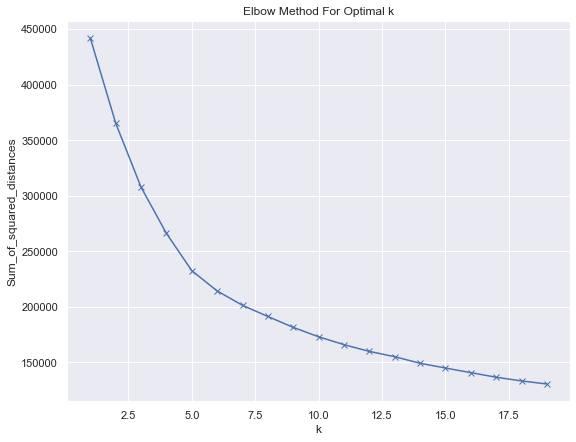

In [264]:
plt.subplots(figsize=(9, 7))
plt.plot(K, Sum_of_squared_distances_case_one, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

As the number of clusters increases, the variance (within-cluster sum of squares) decreases. Hence there is a point when the decrease os thr sum of squared distances is not significant for increasing k-cluster value. That’s how we get the optimal value of k.

In [265]:
clusterer_case_one = KMeans(n_clusters=5, init="random", random_state=42)

#Predict the labels of clusters
cluster_labels_case_one = clusterer_case_one.fit_predict(df_k_means_reduced_PCA_case_one.drop(columns=['customer_unique_id', 'Segment_name', 'F1', 'F2', 'F3', 'F4']).values)

In [266]:
df_k_means_reduced_PCA_case_one['Segment_k_means_label'] = clusterer_case_one.labels_

In [267]:
df_k_means_reduced_PCA_case_one.head()

customer_unique_id  median_review_score  \
0  0000366f3b9a7992bf8c76cfdf3221e2             0.660494   
1  0000b849f77a49e4a4ce2b2a4ca5be3f            -0.119534   
2  0000f46a3911fa3c0805444483337064            -0.899562   
3  0000f6ccb0745a6a4b88665a16c9f078            -0.119534   
4  0004aac84e0df4da2b147fca70cf8255             0.660494   

   median_order_total_number_of_items  delay_days_purchase_delivery  \
0                           -0.314543                     -0.731098   
1                           -0.314543                     -1.724060   
2                           -0.314543                      1.401335   
3                           -0.314543                      1.018144   
4                           -0.314543                      0.390129   

   olist_office_customer_distance      Segment_name  Frequency  \
0                       -0.470234    About To Sleep   -0.17879   
1                       -0.514157    About To Sleep   -0.17879   
2                       -0.838033  Recent customers   -0.17879   
3                        1.790624  Recent customers   -0.17879   
4                       -0.677719  Recent customers   -0.17879   

   Monetary_value   Recency        F1        F2        F3        F4  \
0        0.346429 -0.830536 -1.108528  0.773868 -0.292504 -0.196296   
1       -1.666547 -0.810913 -2.083320 -0.079585  1.448198  0.527800   
2       -0.262229  1.955978  1.548995 -1.745651  0.102286  0.758992   
3       -1.075013  0.543098  0.980370 -1.208029  0.572791 -1.002292   
4        0.743898  0.327241  0.032088 -0.050706 -0.935159 -0.155003   

   Segment_k_means_label  
0                      3  
1                      3  
2                      1  
3                      1  
4                      2

In [268]:
#Getting the Centroids of the clusters
centroids_case_one = clusterer_case_one.cluster_centers_
unique_labels_case_one = np.unique(cluster_labels_case_one)

In [269]:
centroids_case_one

array([[-3.52583265e-01,  2.48795958e+00, -1.09585288e-01,
         5.38054238e-02, -1.78790452e-01,  5.59396806e-01,
         1.29497502e-03],
       [ 3.49440699e-01, -3.13958974e-01,  3.69973566e-02,
         5.62969958e-02, -1.78790452e-01, -3.18416147e-01,
         1.13409660e+00],
       [ 3.85613926e-01, -3.14543451e-01,  4.77011344e-01,
         4.49245851e-01, -1.78790452e-01,  6.49739453e-01,
        -3.82907972e-01],
       [ 3.66393249e-01, -3.10404971e-01, -8.84467288e-01,
        -2.66522025e-01, -1.78790452e-01, -5.56138247e-01,
        -7.29544263e-01],
       [-1.99416404e+00, -2.74321727e-01,  9.04793747e-01,
         2.73945416e-01, -1.78790452e-01, -1.09515285e-02,
        -1.91144968e-03]])

In [270]:
plt.subplots(figsize=(14, 14))
sns.scatterplot(x = df_k_means_reduced_PCA_case_one['F1'], y = df_k_means_reduced_PCA_case_one['F2'], hue = df_k_means_reduced_PCA_case_one['Segment_k_means_label'], s = 30)
plt.title('Clusters by Principal Components')
plt.show()

In [271]:
df_k_means_reduced_PCA_case_one['Segment_k_means_label'].unique()

array([3, 1, 2, 4, 0])

In [272]:
df_k_means_reduced_PCA_case_one['Segment_name'].unique()

array(['About To Sleep', 'Recent customers', 'Potential Loyalists',
       'Lost Customers', 'Hibernating', "Can't Loose Them",
       'Customers Needing Attention'], dtype=object)

* **Potential Loyalists:** Recent customers with average frequency.
* **Recent Customers:** Bought most recently, but not often.
* **Customers Needing Attention:** Above average recency, frequency and monetary values. May not have bought very recently though.
* **Can't Lose Them:** Used to purchase frequently but haven't returned for a long time.
* **Lost Customers:** Purchased long time ago and never came back.

In [273]:
df_k_means_reduced_PCA_case_one['Segment_client_k_means'] = df_k_means_reduced_PCA_case_one['Segment_k_means_label'].map(
            {
                0: 'Can\'t Loose Them',
                1: 'Recent customers', 
                2: 'Customers Needing Attention', 
                3: 'Lost Customers', 
                4: 'Potential Loyalists'
            }
)
df_k_means_reduced_PCA_case_one.head()

customer_unique_id  median_review_score  \
0  0000366f3b9a7992bf8c76cfdf3221e2             0.660494   
1  0000b849f77a49e4a4ce2b2a4ca5be3f            -0.119534   
2  0000f46a3911fa3c0805444483337064            -0.899562   
3  0000f6ccb0745a6a4b88665a16c9f078            -0.119534   
4  0004aac84e0df4da2b147fca70cf8255             0.660494   

   median_order_total_number_of_items  delay_days_purchase_delivery  \
0                           -0.314543                     -0.731098   
1                           -0.314543                     -1.724060   
2                           -0.314543                      1.401335   
3                           -0.314543                      1.018144   
4                           -0.314543                      0.390129   

   olist_office_customer_distance      Segment_name  Frequency  \
0                       -0.470234    About To Sleep   -0.17879   
1                       -0.514157    About To Sleep   -0.17879   
2                       -0.838033  Recent customers   -0.17879   
3                        1.790624  Recent customers   -0.17879   
4                       -0.677719  Recent customers   -0.17879   

   Monetary_value   Recency        F1        F2        F3        F4  \
0        0.346429 -0.830536 -1.108528  0.773868 -0.292504 -0.196296   
1       -1.666547 -0.810913 -2.083320 -0.079585  1.448198  0.527800   
2       -0.262229  1.955978  1.548995 -1.745651  0.102286  0.758992   
3       -1.075013  0.543098  0.980370 -1.208029  0.572791 -1.002292   
4        0.743898  0.327241  0.032088 -0.050706 -0.935159 -0.155003   

   Segment_k_means_label       Segment_client_k_means  
0                      3               Lost Customers  
1                      3               Lost Customers  
2                      1             Recent customers  
3                      1             Recent customers  
4                      2  Customers Needing Attention

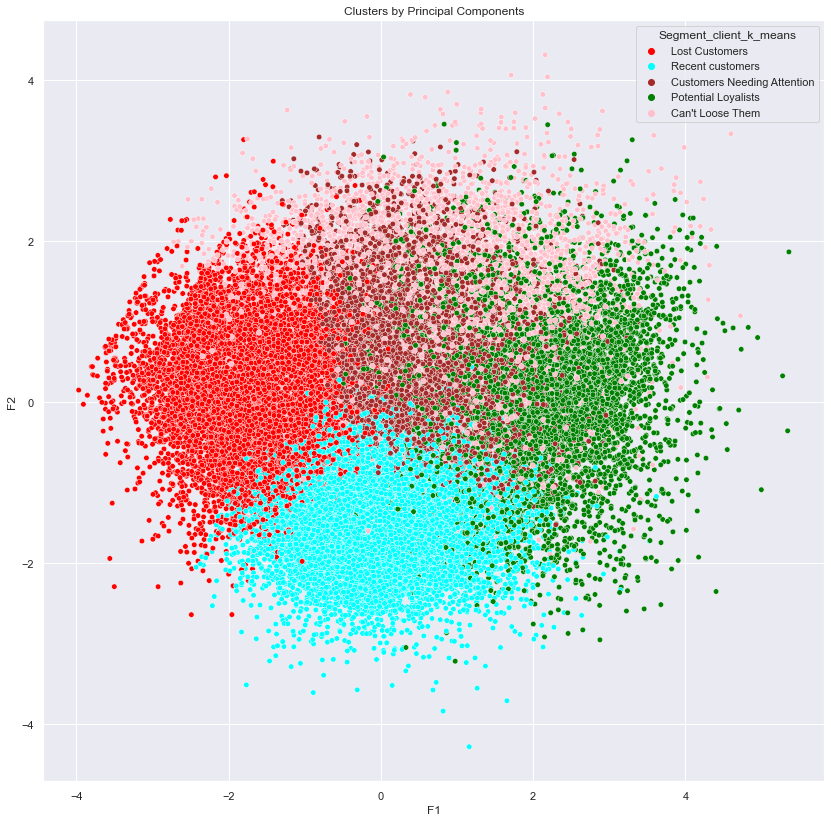

In [274]:
plt.subplots(figsize=(14, 14))
my_pal = {"Lost Customers":"red",
           "Can\'t Loose Them":"pink",
           "Customers Needing Attention":"brown",
           "Recent customers":"cyan",
           "Potential Loyalists":"green"}
sns.scatterplot(x = df_k_means_reduced_PCA_case_one['F1'], y = df_k_means_reduced_PCA_case_one['F2'], hue = df_k_means_reduced_PCA_case_one['Segment_client_k_means'], palette=my_pal, s = 30)
plt.title('Clusters by Principal Components')
plt.show()

In [275]:
# plt.subplots(figsize=(14, 14))
# my_pal = {"Lost Customers":"red",
#            "Can\'t Loose Them":"pink",
#            "Customers Needing Attention":"brown",
#            "Recent customers":"cyan",
#            "Potential Loyalists":"green"}
# sns.scatterplot(x = df_k_means_reduced_PCA_case_one['F2'], y = df_k_means_reduced_PCA_case_one['F3'], hue = df_k_means_reduced_PCA_case_one['Segment_client_k_means'], palette=my_pal, s = 30)
# plt.title('Clusters by Principal Components')
# plt.show()

### Interpretation of automatic segmentation

In [276]:
df_k_means_reduced_PCA_case_one.columns

Index(['customer_unique_id', 'median_review_score',
       'median_order_total_number_of_items', 'delay_days_purchase_delivery',
       'olist_office_customer_distance', 'Segment_name', 'Frequency',
       'Monetary_value', 'Recency', 'F1', 'F2', 'F3', 'F4',
       'Segment_k_means_label', 'Segment_client_k_means'],
      dtype='object')

In [277]:
new_df_k_means_reduced_PCA_case_one = df_k_means_reduced_PCA_case_one.copy()

In [278]:
new_df_k_means_reduced_PCA_case_one = new_df_k_means_reduced_PCA_case_one.drop(columns=['median_review_score',
       'median_order_total_number_of_items', 'delay_days_purchase_delivery',
       'olist_office_customer_distance', 'Segment_name', 'Frequency',
       'Monetary_value', 'Recency', 'F1', 'F2', 'F3', 'F4',])

In [279]:
df_merge_segmentation_interpretation = new_df_k_means_reduced_PCA_case_one.copy()

In [280]:
df_merge_segmentation_interpretation = df_merge_segmentation_interpretation.merge(automatic_segmentation_new_df, on='customer_unique_id', how='left') 

In [281]:
df_merge_segmentation_interpretation.columns

Index(['customer_unique_id', 'Segment_k_means_label', 'Segment_client_k_means',
       'median_review_score', 'median_order_total_number_of_items',
       'median_appliances_products_per_customer',
       'median_of_arts_products_per_customer',
       'median_of_auto_products_per_customer',
       'median_of_construction_products_per_customer',
       'median_of_electronics_products_per_customer',
       'median_of_fashion_products_per_customer',
       'median_of_food_drinks_products_per_customer',
       'median_of_garden_pets_products_per_customer',
       'median_of_health_beauty_products_per_customer',
       'median_of_home_products_per_customer',
       'median_of_office_products_per_customer',
       'median_of_other_products_per_customer',
       'median_of_sports_leisure_products_per_customer',
       'delay_days_purchase_delivery', 'olist_office_customer_distance',
       'Segment_name', 'Frequency', 'Monetary_value', 'Recency'],
      dtype='object')

In [282]:
df_merge_segmentation_interpretation = df_merge_segmentation_interpretation.drop(columns=['median_appliances_products_per_customer',
       'median_of_arts_products_per_customer',
       'median_of_auto_products_per_customer',
       'median_of_construction_products_per_customer',
       'median_of_electronics_products_per_customer',
       'median_of_fashion_products_per_customer',
       'median_of_food_drinks_products_per_customer',
       'median_of_garden_pets_products_per_customer',
       'median_of_health_beauty_products_per_customer',
       'median_of_home_products_per_customer',
       'median_of_office_products_per_customer',
       'median_of_other_products_per_customer',
       'median_of_sports_leisure_products_per_customer',
       'customer_unique_id',
       'Segment_name'])

In [283]:
df_merge_segmentation_interpretation.head()

Segment_k_means_label       Segment_client_k_means  median_review_score  \
0                      3               Lost Customers                  5.0   
1                      3               Lost Customers                  4.0   
2                      1             Recent customers                  3.0   
3                      1             Recent customers                  4.0   
4                      2  Customers Needing Attention                  5.0   

   median_order_total_number_of_items  delay_days_purchase_delivery  \
0                                 1.0                             6   
1                                 1.0                             3   
2                                 1.0                            26   
3                                 1.0                            20   
4                                 1.0                            13   

   olist_office_customer_distance  Frequency  Monetary_value  Recency  
0                      341.289832        1.0           142.0      111  
1                      327.884519        1.0            27.0      114  
2                      244.000753        1.0            86.0      537  
3                     2683.723638        1.0            44.0      321  
4                      282.432265        1.0           197.0      288

In [284]:
df_stats_segmentation = df_merge_segmentation_interpretation.copy()

In [285]:
df_stats_segmentation.columns

Index(['Segment_k_means_label', 'Segment_client_k_means',
       'median_review_score', 'median_order_total_number_of_items',
       'delay_days_purchase_delivery', 'olist_office_customer_distance',
       'Frequency', 'Monetary_value', 'Recency'],
      dtype='object')

In [286]:
df_stats_segmentation = df_stats_segmentation.groupby('Segment_client_k_means')[['Frequency', 'Monetary_value', 'Recency']].agg([np.mean])

In [287]:
new_df_stats_segmentation = df_stats_segmentation.copy()

In [288]:
new_df_stats_segmentation["size"] = df_merge_segmentation_interpretation.groupby('Segment_client_k_means')[['Recency']].agg([np.size]) 

In [302]:
new_df_stats_segmentation.round(1).head()

Frequency Monetary_value Recency   size
                                 mean           mean    mean       
Segment_client_k_means                                             
Can't Loose Them                  1.0          221.6   238.2   7401
Customers Needing Attention       1.0          251.6   179.2  22368
Lost Customers                    1.0           83.6   126.6  22971
Potential Loyalists               1.0          152.5   237.7  10862
Recent customers                  1.0          104.7   411.1  22020

* **Potential Loyalists:** Recent customers with average frequency.
* **Recent Customers:** Bought most recently, but not often.
* **Customers Needing Attention:** Above average recency, frequency and monetary values. May not have bought very recently though.
* **Can't Lose Them:** Used to purchase frequently but haven't returned for a long time.
* **Lost Customers:** Purchased long time ago and never came back.

### DBSCAN algorithm

In [306]:
from sklearn.cluster import DBSCAN

In [318]:
df_dbscan_reduced_PCA_case_one = df_for_PCA_case_one.copy()

In [319]:
df_dbscan_reduced_PCA_case_one.drop(columns=['customer_unique_id', 'Segment_name', 'F1', 'F2', 'F3', 'F4']).values

array([[ 0.66049446, -0.31454345, -0.73109795, ..., -0.17879045,
         0.34642894, -0.83053642],
       [-0.11953376, -0.31454345, -1.72405956, ..., -0.17879045,
        -1.66654732, -0.81091308],
       [-0.89956199, -0.31454345,  1.40133469, ..., -0.17879045,
        -0.26222904,  1.95597813],
       ...,
       [-0.11953376, -0.31454345,  1.61050746, ..., -0.17879045,
        -0.27642118,  0.15717179],
       [ 0.66049446, -0.31454345,  0.59855794, ..., -0.17879045,
         0.05834362,  2.15875267],
       [ 0.66049446, -0.31454345,  0.27364333, ..., -0.17879045,
         0.2760351 , -0.77820751]])

In [321]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
db_default = DBSCAN(eps = 0.5, min_samples = 5).fit(df_dbscan_reduced_PCA_case_one.drop(columns=['customer_unique_id', 'Segment_name', 'F1', 'F2', 'F3', 'F4']).values)
labels = db_default.labels_

In [322]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [323]:
df_dbscan_reduced_PCA_case_one['Segment_dbscan_label'] = labels

In [324]:
df_dbscan_reduced_PCA_case_one.head()

customer_unique_id  median_review_score  \
0  0000366f3b9a7992bf8c76cfdf3221e2             0.660494   
1  0000b849f77a49e4a4ce2b2a4ca5be3f            -0.119534   
2  0000f46a3911fa3c0805444483337064            -0.899562   
3  0000f6ccb0745a6a4b88665a16c9f078            -0.119534   
4  0004aac84e0df4da2b147fca70cf8255             0.660494   

   median_order_total_number_of_items  delay_days_purchase_delivery  \
0                           -0.314543                     -0.731098   
1                           -0.314543                     -1.724060   
2                           -0.314543                      1.401335   
3                           -0.314543                      1.018144   
4                           -0.314543                      0.390129   

   olist_office_customer_distance      Segment_name  Frequency  \
0                       -0.470234    About To Sleep   -0.17879   
1                       -0.514157    About To Sleep   -0.17879   
2                       -0.838033  Recent customers   -0.17879   
3                        1.790624  Recent customers   -0.17879   
4                       -0.677719  Recent customers   -0.17879   

   Monetary_value   Recency        F1        F2        F3        F4  \
0        0.346429 -0.830536 -1.108528  0.773868 -0.292504 -0.196296   
1       -1.666547 -0.810913 -2.083320 -0.079585  1.448198  0.527800   
2       -0.262229  1.955978  1.548995 -1.745651  0.102286  0.758992   
3       -1.075013  0.543098  0.980370 -1.208029  0.572791 -1.002292   
4        0.743898  0.327241  0.032088 -0.050706 -0.935159 -0.155003   

   Segment_dbscan_label  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

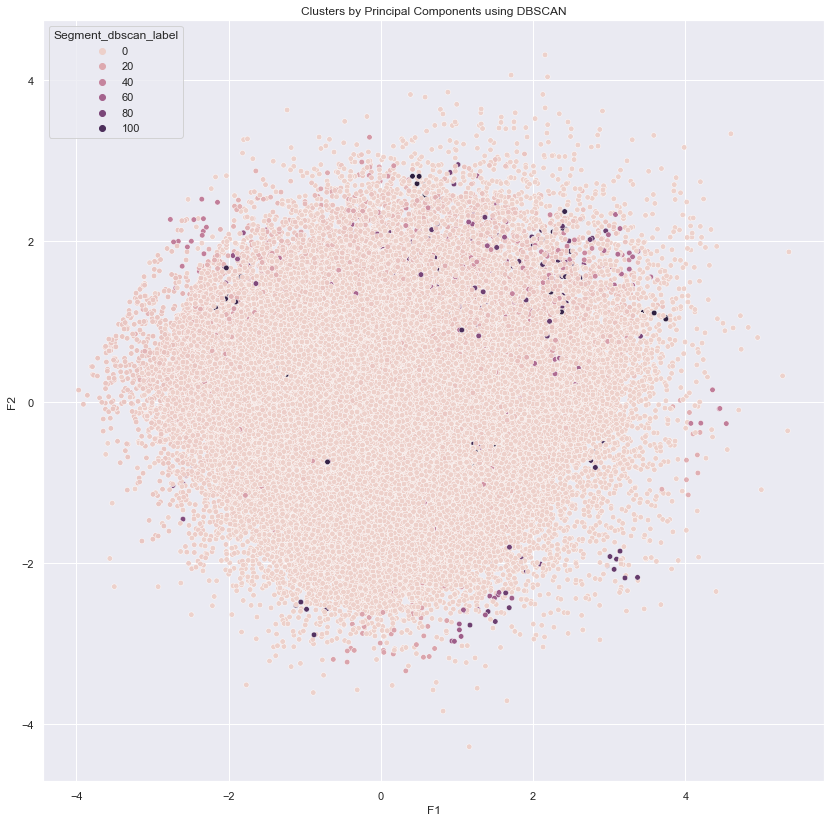

In [325]:
plt.subplots(figsize=(14, 14))
sns.scatterplot(x = df_dbscan_reduced_PCA_case_one['F1'], y = df_dbscan_reduced_PCA_case_one['F2'], hue = df_dbscan_reduced_PCA_case_one['Segment_dbscan_label'], s = 30)
plt.title('Clusters by Principal Components using DBSCAN')
plt.show()

### TSNE TEST

In [291]:
#TSNE 

from sklearn.manifold import TSNE


In [307]:
# df_k_means_reduced_PCA_case_one.drop(columns=['customer_unique_id', 'Segment_name', 'F1', 'F2', 'F3', 'F4','Segment_client_k_means', 'Segment_k_means_label']).head()

In [299]:
tsne = TSNE(verbose=1, random_state=42, perplexity=70)
tsne_result = tsne.fit_transform(df_k_means_reduced_PCA_case_one[:1000].drop(columns=['customer_unique_id', 'Segment_name', 'F1', 'F2', 'F3', 'F4','Segment_client_k_means', 'Segment_k_means_label']).values) 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 211 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.004s...
[t-SNE] Computed neighbors for 1000 samples in 0.072s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.785746
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.364746
[t-SNE] KL divergence after 1000 iterations: 0.869663


In [300]:
tsne_result

array([[ 14.673178 ,  -2.9798112],
       [ 15.0411005,   6.231501 ],
       [ -5.521885 ,  11.35061  ],
       ...,
       [-23.16128  ,  17.088186 ],
       [  5.0459065,  -9.482278 ],
       [  9.876362 ,  -3.4695222]], dtype=float32)

[Text(0.5, 1.0, 'Data T-SNE projection')]

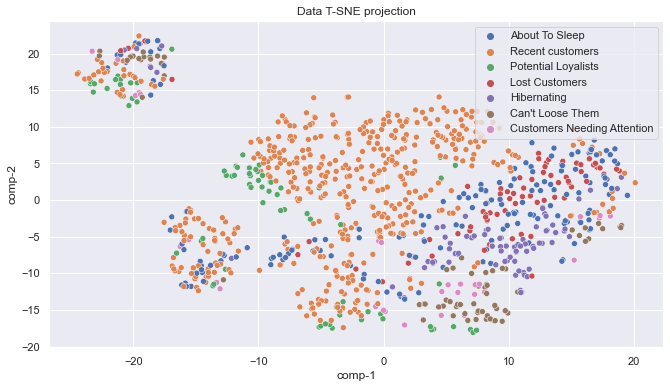

In [301]:
df = pd.DataFrame()
df["y"] = df_k_means_reduced_PCA_case_one['Segment_name'][:1000]
df["comp-1"] = tsne_result[:,0]
df["comp-2"] = tsne_result[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                # palette=my_pal,
                # palette=sns.color_palette("hls", 3),
                data=df).set(title="Data T-SNE projection")